# 📊 Examen: Desarrollo de la clase EDA usando NumPy y Python

Este examen evalúa tu capacidad para implementar una herramienta básica de análisis exploratorio de datos (EDA) usando exclusivamente **NumPy** y Python.

# 📘 Contextualización y especificación del ejercicio
Trabajas como **analista de datos** en una empresa que recibe diariamente datos generados por una red de sensores ambientales.
Los archivos llegan en **CSV** y contienen mediciones relacionadas con temperatura, presión, humedad y una categoría asociada.

Sin embargo, estos datos presentan múltiples problemas: valores faltantes, duplicados, columnas duplicadas, outliers, rangos distintos y correlaciones entre variables.

Para automatizar el análisis, debes implementar una clase llamada **`EDA`**, utilizando exclusivamente **NumPy**, sin pandas ni librerías externas.

La clase debe ser capaz de:
- Cargar y estructurar los datos
- Detectar tipos de columnas (numéricas / categóricas)
- Resumir estadísticas básicas
- Detectar outliers mediante IQR
- Rellenar valores NaN
- Normalizar columnas numéricas
- Detectar y eliminar duplicados
- Calcular la matriz de correlación

## 🧩 Funcionalidad esperada de cada método de la clase `EDA`

### **1. `__init__(self, csv_path)`**
- Carga el CSV usando `numpy.genfromtxt`.
- Crea variables para cabeceras(headers) y datos(data)
- Detecta columnas numéricas y categóricas.
- Convierte valores vacíos en `np.nan`.

### **2. `info(self)`**
Debe mostrar:
- Nº de filas y columnas
- Valores NaN por columna
- Columnas numéricas vs categóricas
- Columnas duplicadas
- Número de filas duplicadas

### **3. `summary(self)`**
Calcula para cada columna numérica:
- Media
- Mediana
- Mínimo
- Máximo
- Varianza
- Desviación estándar

### **4. `detect_outliers(self, col_index)`**
Detecta outliers usando el método **IQR**:
Valores fuera de:
`[Q1 - 1.5·IQR, Q3 + 1.5·IQR]`.

### **5. `fill_missing_with_mean(self)`**
Reemplaza valores NaN en columnas numéricas por la media.

### **6. `normalize(self)`**
Normaliza columnas numéricas usando Min–Max scaling.

### **7. `remove_duplicates(self)`**
Elimina filas duplicadas.

### **8. `correlation_matrix(self)`**
Devuelve una matriz con correlaciones de Pearson entre cada par de columnas numéricas.

---
⚠ **IMPORTANTE:** Solo puedes modificar la celda donde está la clase `EDA`.

# 📥 Inserción del dataset (NO modificar)

In [ ]:
%%writefile sensores.csv
temperatura,presion,humedad,categoria,presion_duplicada,temperatura_duplicada
22.5,1012,45,Media,1012,22.5
23.0,1015,47,Media,1015,23.0
21.8,1009,44,Baja,1009,21.8
25.2,1020,50,Alta,1020,25.2
24.9,1018,NaN,Alta,1018,24.9
NaN,1011,42,Media,1011,NaN
22.5,1012,45,Media,1012,22.5
30.0,1500,20,Alta,1500,30.0
19.5,950,80,Baja,950,19.5
50.0,2000,10,Alta,2000,50.0
21.8,1009,44,Baja,1009,21.8
23.0,1015,47,Media,1015,23.0
NaN,980,85,Baja,980,NaN
20.0,1005,40,Media,1005,20.0
24.0,1022,55,Alta,1022,24.0

Writing sensores.csv


# 🧩 Celda editable por el alumno
### ❗ Escribe aquí tu implementación de la clase EDA
### ❗ Utiliza Numpy donde sea más rápido
### ❗ No uses pandas, sklearn ni librerías externas

In [ ]:
import numpy as np

class EDA:
    def __init__(self, csv_path):
      self.csv_path = csv_path
      self.data = np.genfromtxt(csv_path, delimiter=',', skip_header=1, filling_values=-999, dtype=None)
      pass

    def info(self):
        data = self.data
        print("Dato Sacado")
        print(data)
        print(f"Filas: {self.data.shape}, Columnas: {self.data.size}")
        pass

    def summary(self):
        pass

    def detect_outliers(self, col_index):
        pass

    def fill_missing_with_mean(self):
        pass

    def normalize(self):
        pass

    def remove_duplicates(self):
        #np.unique(self.data)
        pass

    def correlation_matrix(self):
        #Coorelación de Person
        pass

# 🧪 Caso de Prueba

In [ ]:
# ===========================================
# CELDA DE PRUEBA DE TODAS LAS FUNCIONES DE EDA
# ===========================================

# Instanciar la clase con el CSV
eda = EDA('sensores.csv')

print("===== INFO =====")
eda.info()  # Muestra filas, columnas, NaN, duplicados

print("\n===== SUMMARY ANTES DE RELLENAR NaN =====")
eda.summary()  # Estadísticas antes de rellenar NaN

print("\n===== DETECCIÓN DE OUTLIERS (columna 'presion') =====")
col_index = np.where(eda.headers == 'presion')[0][0]
outliers_idx = eda.detect_outliers(col_index)
print(f"Indices de outliers en '{eda.headers[col_index]}': {outliers_idx}")

# Mostrar valores de los outliers
col_data = eda.data[:, col_index].astype(float)  # convertir a float
outliers_values = col_data[outliers_idx]
print(f"Valores de outliers en '{eda.headers[col_index]}': {outliers_values}")

print("\n===== RELLENAR NaN CON MEDIA =====")
eda.fill_missing_with_mean()
eda.summary()  # Estadísticas después de rellenar NaN

print("\n===== NORMALIZACIÓN DE COLUMNAS NUMÉRICAS =====")
eda.normalize()
eda.summary()  # Estadísticas después de normalizar

print("\n===== ELIMINAR FILAS DUPLICADAS =====")
before = eda.data.shape[0]
eda.remove_duplicates()
after = eda.data.shape[0]
print(f"Filas antes: {before}, Filas después: {after}")

print("\n===== MATRIZ DE CORRELACIÓN =====")
corr_matrix = eda.correlation_matrix()
print("Matriz de correlación (columnas numéricas):")
print(corr_matrix)


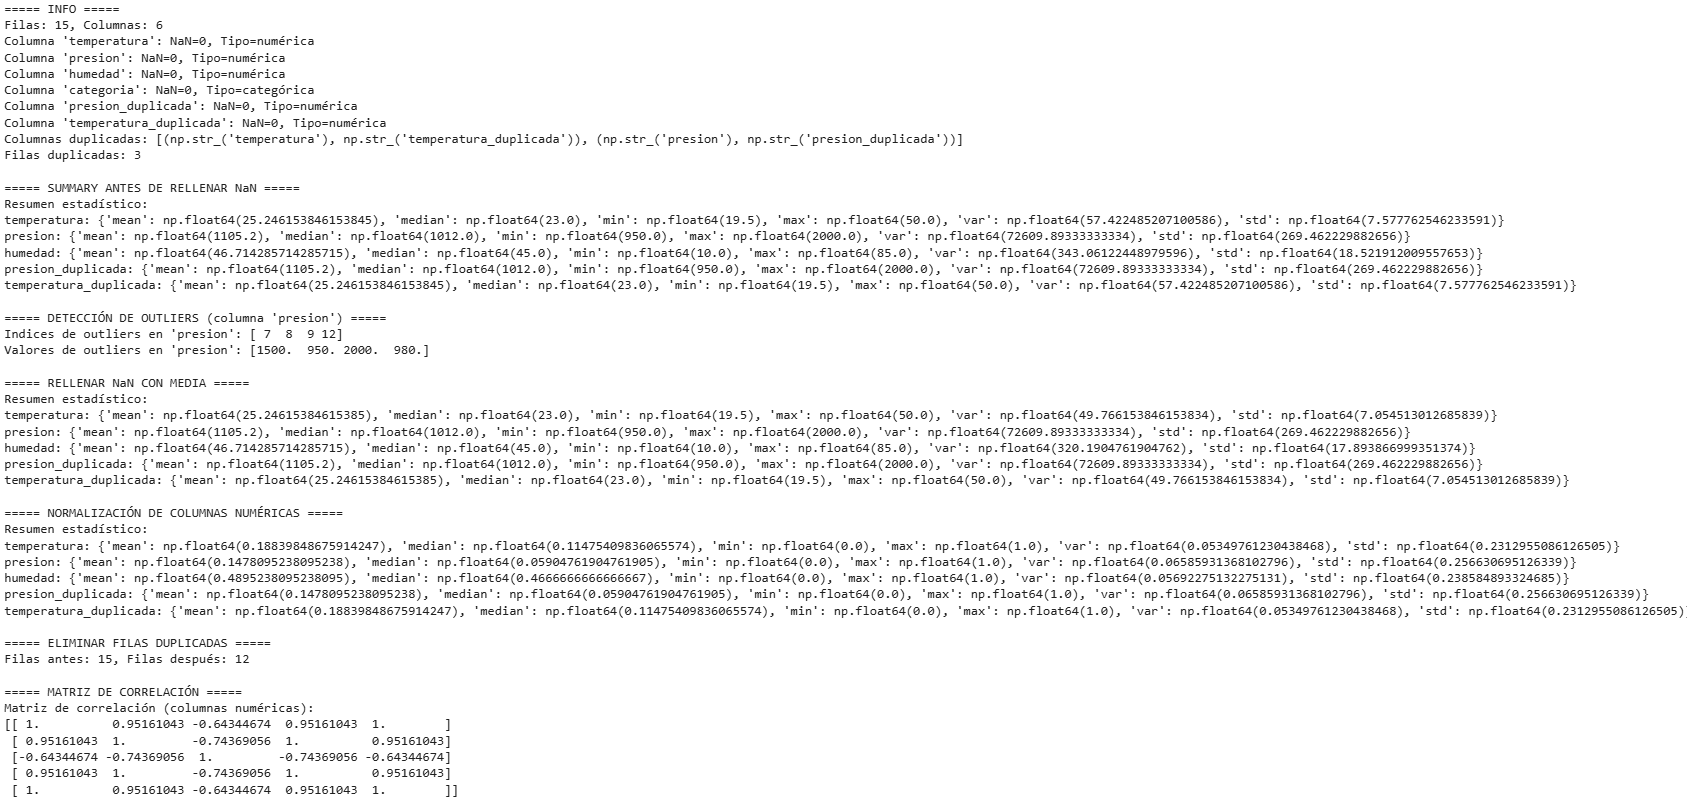

Notas:

ETL
1. Extracción de datos .CSV de parametros en forma de tabla:  
[temperatura, presión, humedad, categoria asociada]
2. Problemas (ruido del dataframe)
  1. Valores faltantes
  2. Duplicados
  3. Columnas Duplicadas
  4. Outliners(valores desbordordantes)
  5. Rangos distintos
  6. Coorelaciones entre variables

Para ello utilizar clase EDA (al final una clase es una estructura de datos personalizada como el objeto np de numpy)
- EDA
  - Cargar y estructurar los datos [ ]
  - Detectar tipos de columnas (numéricas / categóricas)
  - Resumir estadísticas básicas
  - Detectar outliers mediante IQR
  - Rellenar valores NaN
  - Normalizar columnas numéricas
  - Detectar y eliminar duplicados
  - Calcular la matriz de correlación

Cargar y estructurar los datos

In [ ]:
# Ejemplo dataframe

df = np.array([
  ["temperatura","presion,humedad","categoria","presion_duplicada","temperatura_duplicada"],
  [22.5,1012,45,Media,1012,22.5],
  [23.0,1015,47,Media,1015,23.0],
  [21.8,1009,44,Baja,1009,21.8],
  [25.2,1020,50,Alta,1020,25.2],
  [24.9,1018,NaN,Alta,1018,24.9],
  [NaN,1011,42,Media,1011,NaN],
  [22.5,1012,45,Media,1012,22.5],
  [30.0,1500,20,Alta,1500,30.0],
  [19.5,950,80,Baja,950,19.5],
  [50.0,2000,10,Alta,2000,50.0],
  [21.8,1009,44,Baja,1009,21.8],
  [23.0,1015,47,Media,1015,23.0],
  [NaN,980,85,Baja,980,NaN],
  [20.0,1005,40,Media,1005,20.0],
  [24.0,1022,55,Alta,1022,24.0],
])

NameError: name 'temperatura' is not defined

In [ ]:
import numpy as np
import csv

with open('sensores.csv', newline='') as csvfile:
  spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
  for row in spamreader:
    print(', '.join(row))

#sensores = np.loadtxt('sensores.csv')#No se pueden leer archiv .csv con las clase np.loadtxt


temperatura,presion,humedad,categoria,presion_duplicada,temperatura_duplicada
22.5,1012,45,Media,1012,22.5
23.0,1015,47,Media,1015,23.0
21.8,1009,44,Baja,1009,21.8
25.2,1020,50,Alta,1020,25.2
24.9,1018,NaN,Alta,1018,24.9
NaN,1011,42,Media,1011,NaN
22.5,1012,45,Media,1012,22.5
30.0,1500,20,Alta,1500,30.0
19.5,950,80,Baja,950,19.5
50.0,2000,10,Alta,2000,50.0
21.8,1009,44,Baja,1009,21.8
23.0,1015,47,Media,1015,23.0
NaN,980,85,Baja,980,NaN
20.0,1005,40,Media,1005,20.0
24.0,1022,55,Alta,1022,24.0


In [ ]:
def open_csv(ruta):
  with open(ruta, newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in spamreader:
      print(', '.join(row))
def np_csv(ruta):
  np.set_printoptions(suppress=True)
  data = np.genfromtxt(ruta, delimiter=',', skip_header=1, filling_values=-999, dtype=None)
  return data


In [ ]:
data = np_csv('sensores.csv')
print(data)
t = np.genfromtxt('sensores.csv', delimiter=',', skip_header=1, filling_values=-999, dtype='float')
# [......]
#[[],[],[]]
dataFix = t.reshape(15,6)
print(dataFix[0])
data = t[0].reshape(2,3)

[(22.5, 1012, 45., 'Media', 1012, 22.5)
 (23. , 1015, 47., 'Media', 1015, 23. )
 (21.8, 1009, 44., 'Baja', 1009, 21.8)
 (25.2, 1020, 50., 'Alta', 1020, 25.2)
 (24.9, 1018, nan, 'Alta', 1018, 24.9)
 ( nan, 1011, 42., 'Media', 1011,  nan)
 (22.5, 1012, 45., 'Media', 1012, 22.5)
 (30. , 1500, 20., 'Alta', 1500, 30. )
 (19.5,  950, 80., 'Baja',  950, 19.5)
 (50. , 2000, 10., 'Alta', 2000, 50. )
 (21.8, 1009, 44., 'Baja', 1009, 21.8)
 (23. , 1015, 47., 'Media', 1015, 23. )
 ( nan,  980, 85., 'Baja',  980,  nan)
 (20. , 1005, 40., 'Media', 1005, 20. )
 (24. , 1022, 55., 'Alta', 1022, 24. )]
[  22.5 1012.    45.  -999.  1012.    22.5]


In [ ]:
class EDA_2:
    def __init__(self, csv_path: str):
        self.csv_path = csv_path
        self.data = np.genfromtxt(csv_path, delimiter=',', skip_header=1, filling_values=-999, dtype=None)
        pass
    def info(self):
      data = self.data

      print(data.reshape(15))
      print(type(self.data))
      print('Num Dimensions: ', self.data.ndim)
      print(f"Filas: {self.data.shape}, Columnas: {self.data.size}")
      print("TABLA")
      print(self.data)
      pass



In [ ]:
df = EDA_2('sensores.csv')
df.info()

[(22.5, 1012, 45., 'Media', 1012, 22.5)
 (23. , 1015, 47., 'Media', 1015, 23. )
 (21.8, 1009, 44., 'Baja', 1009, 21.8)
 (25.2, 1020, 50., 'Alta', 1020, 25.2)
 (24.9, 1018, nan, 'Alta', 1018, 24.9)
 ( nan, 1011, 42., 'Media', 1011,  nan)
 (22.5, 1012, 45., 'Media', 1012, 22.5)
 (30. , 1500, 20., 'Alta', 1500, 30. )
 (19.5,  950, 80., 'Baja',  950, 19.5)
 (50. , 2000, 10., 'Alta', 2000, 50. )
 (21.8, 1009, 44., 'Baja', 1009, 21.8)
 (23. , 1015, 47., 'Media', 1015, 23. )
 ( nan,  980, 85., 'Baja',  980,  nan)
 (20. , 1005, 40., 'Media', 1005, 20. )
 (24. , 1022, 55., 'Alta', 1022, 24. )]
<class 'numpy.ndarray'>
Num Dimensions:  1
Filas: (15,), Columnas: 15
TABLA
[(22.5, 1012, 45., 'Media', 1012, 22.5)
 (23. , 1015, 47., 'Media', 1015, 23. )
 (21.8, 1009, 44., 'Baja', 1009, 21.8)
 (25.2, 1020, 50., 'Alta', 1020, 25.2)
 (24.9, 1018, nan, 'Alta', 1018, 24.9)
 ( nan, 1011, 42., 'Media', 1011,  nan)
 (22.5, 1012, 45., 'Media', 1012, 22.5)
 (30. , 1500, 20., 'Alta', 1500, 30. )
 (19.5,  950, 80